In [12]:
# import and setup

import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Add parent directory to path so algorithms can be imported
sys.path.append(os.path.abspath("../algorithms"))

# Import algorithms
#from greedy import greedy_clique
#from local_search import local_search
from randomized import randomized_max_clique
from simulated_annealing import simulated_annealing_with_restarts
#from bron_kerbosch import bron_kerbosch

print("All algorithms imported successfully.")

All algorithms imported successfully.


Converting NetworkX graph to adjacency dictionary for SA...

Simulated Annealing:
Clique size = 4
Clique nodes = {8, 2, 3, 4}
Runtime = 0.4704 sec


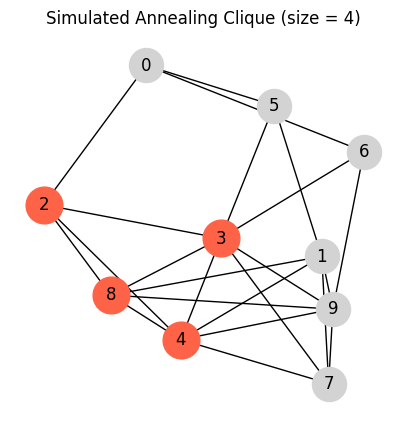

In [14]:
# --- Helper function to convert graph format ---
def nx_to_adj_dict(G_nx: nx.Graph) -> dict:
    """
    Converts a networkx graph to the adjacency dictionary format 
    that your SA algorithm expects.
    """
    # Create dictionary {node: {neighbors}}
    adj_dict = {node: set(neighbors) for node, neighbors in G_nx.adj.items()}
    
    # Ensure all nodes are present as keys, even if they have 0 degree
    for node in G_nx.nodes():
        if node not in adj_dict:
            adj_dict[node] = set()
    return adj_dict


# --- Run Simulated Annealing Algorithm ---
print("Converting NetworkX graph to adjacency dictionary for SA...")

# 1. CONVERT THE GRAPH FORMAT
#    G is a networkx.Graph object
#    G_dict is the Dict[int, Set[int]] your script needs
G_dict = nx_to_adj_dict(G)

start = time.time()

# 2. CALL THE CORRECT FUNCTION with the correct graph format
clique_s, sa_runtime, _ = simulated_annealing_with_restarts(
    G_dict, 
    num_restarts=10, 
    verbose=False
)
size_s = len(clique_s)
end = time.time()

print("\nSimulated Annealing:")
print(f"Clique size = {size_s}")
print(f"Clique nodes = {clique_s}")
print(f"Runtime = {end - start:.4f} sec")

# --- Visualization of Clique in Graph ---
# (This uses the original 'G' and 'pos' for plotting, which is correct)
plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600)
nx.draw_networkx_nodes(G, pos, nodelist=clique_s, node_color='tomato', node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_color='black')
plt.title(f"Simulated Annealing Clique (size = {size_s})")
plt.axis('off')
plt.show()

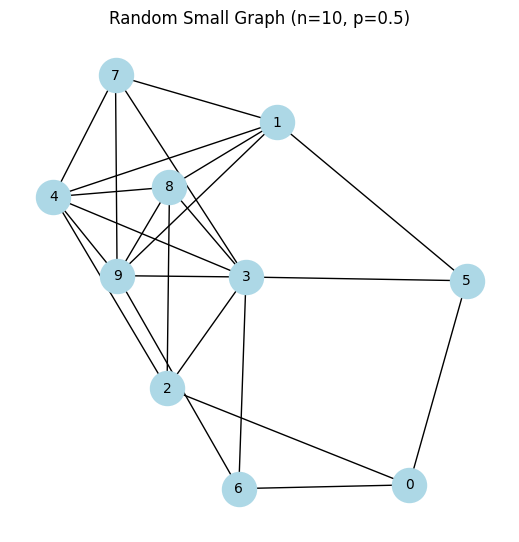

Graph created with 10 nodes and 23 edges.


In [13]:
# generate small graphs

def generate_random_graph(num_nodes=10, edge_prob=0.4):
    """
    Generates a random undirected graph using Erdos–Renyi model.
    """
    G = nx.erdos_renyi_graph(num_nodes, edge_prob)
    return G

# Example: generate one small graph
G = generate_random_graph(num_nodes=10, edge_prob=0.5)

# Visualize it
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=600, font_size=10)
plt.title("Random Small Graph (n=10, p=0.5)")
plt.show()

# Set a consistent layout for all following plots
pos = nx.spring_layout(G, seed=42)
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

In [ ]:
# Greedy

In [ ]:
# Local search

In [10]:
# --- Run Randomized Heuristic Algorithm ---
start = time.time()
size, clique, _ = randomized_max_clique(G, restarts=10)
end = time.time()

print(f"Randomized Heuristic:")
print(f"  Clique size  = {size}")
print(f"  Clique nodes = {clique}")
print(f"  Runtime      = {end - start:.4f} sec")

# --- Visualization of Clique in Graph ---
# Highlight the found clique in red
pos = nx.spring_layout(G, seed=42)  # fixed layout for consistency

plt.figure(figsize=(5,5))
# draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600)
# highlight clique nodes
nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color='tomato', node_size=700)
# draw edges
nx.draw_networkx_edges(G, pos)
# labels
nx.draw_networkx_labels(G, pos, font_color='black')

plt.title(f"Randomized Heuristic Clique (size = {size})")
plt.axis('off')
plt.show()


AttributeError: 'Graph' object has no attribute 'keys'

In [ ]:
#local random


In [ ]:
# bron kerbosch